<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-ML-case-study/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Decision tree using sklearn and
its parameter tuning

Steps:
1. Importing the library files
2. Reading the Iris Dataset
3. Preprocessing
4. Split the dataset into training and testing
5. Build the model (Decision Tree Model)
6. Evaluate the performance of the Model
7. Visualize the model


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split


In [ ]:
iris = pd.read_csv("/content/iris..csv")


In [ ]:
print (iris.shape)
print(iris.head())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
print(iris.species)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Preprocessing

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(iris.species)
iris['species'] = le.transform(iris.species)
print(iris)
print(iris.species)


     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [ ]:
X=iris.iloc[:,0:4]


In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=iris.iloc[:,4:]

In [ ]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state = 1234)

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)


(45, 4)
(105, 4)
(45, 1)
(105, 1)


In [ ]:
clf_train = DecisionTreeClassifier(criterion='gini',random_state=1234)
dt_train = clf_train.fit(x_train, y_train)


In [ ]:
y_pred = dt_train.predict(x_test)


In [ ]:
y_pred[:10]


array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2])

In [ ]:
print(y_test[0:11])

     species
91         1
63         1
103        2
6          0
59         1
29         0
27         0
35         0
99         1
122        2
82         1


In [ ]:
import sklearn.metrics as metrics
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred)
confusion

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 12]])

In [ ]:
# check the accuracy on the training set
print(dt_train.score(x_train, y_train))
print(dt_train.score(x_test, y_test))


1.0
0.9777777777777777


In [ ]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Visualize the Decision Tree on Training Data


In [ ]:
text_representation = tree.export_text(clf_train)
print(text_representation)


|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [ ]:
with open("decistion_tree_train.log", "w") as fout:
 fout.write(text_representation)

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)',
 'petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

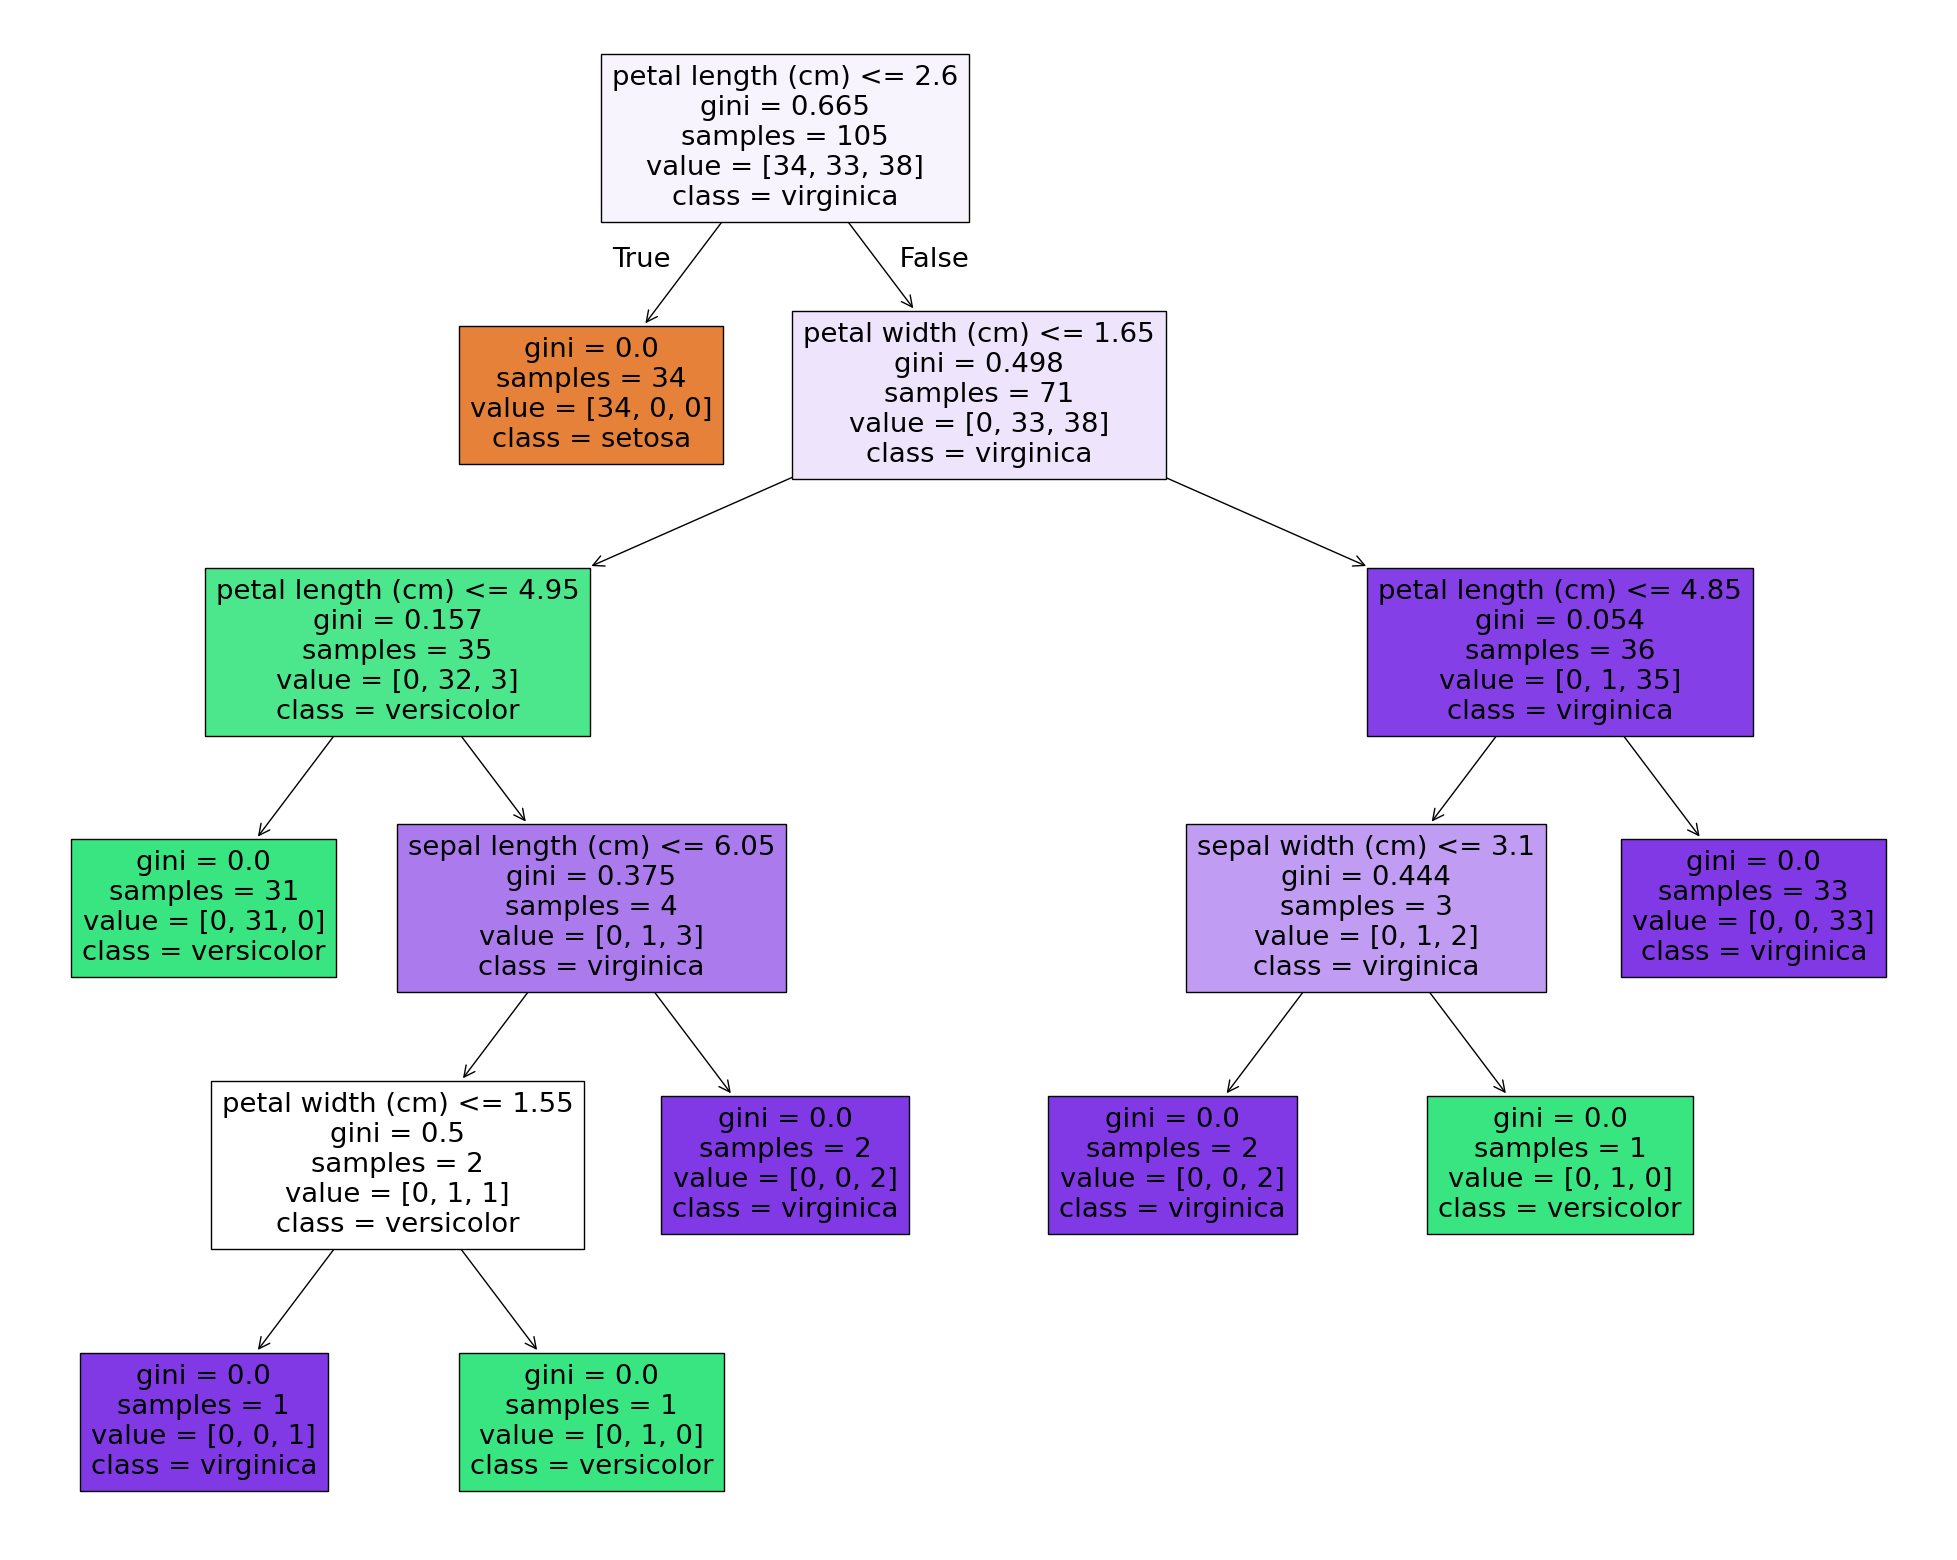

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_train, feature_names=fn, class_names=cn,filled=True)
#fig.savefig('imagename.png')
fig.savefig("decision_tree_train.png")


Visualize the Decision Tree on Testing Data

In [ ]:
clf_test = DecisionTreeClassifier(random_state=1234)
dt_test = clf_test.fit(x_test, y_test)

In [ ]:
text_representation = tree.export_text(clf_test)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



In [ ]:
with open("decistion_tree_test.log", "w") as fout:
 fout.write(text_representation)

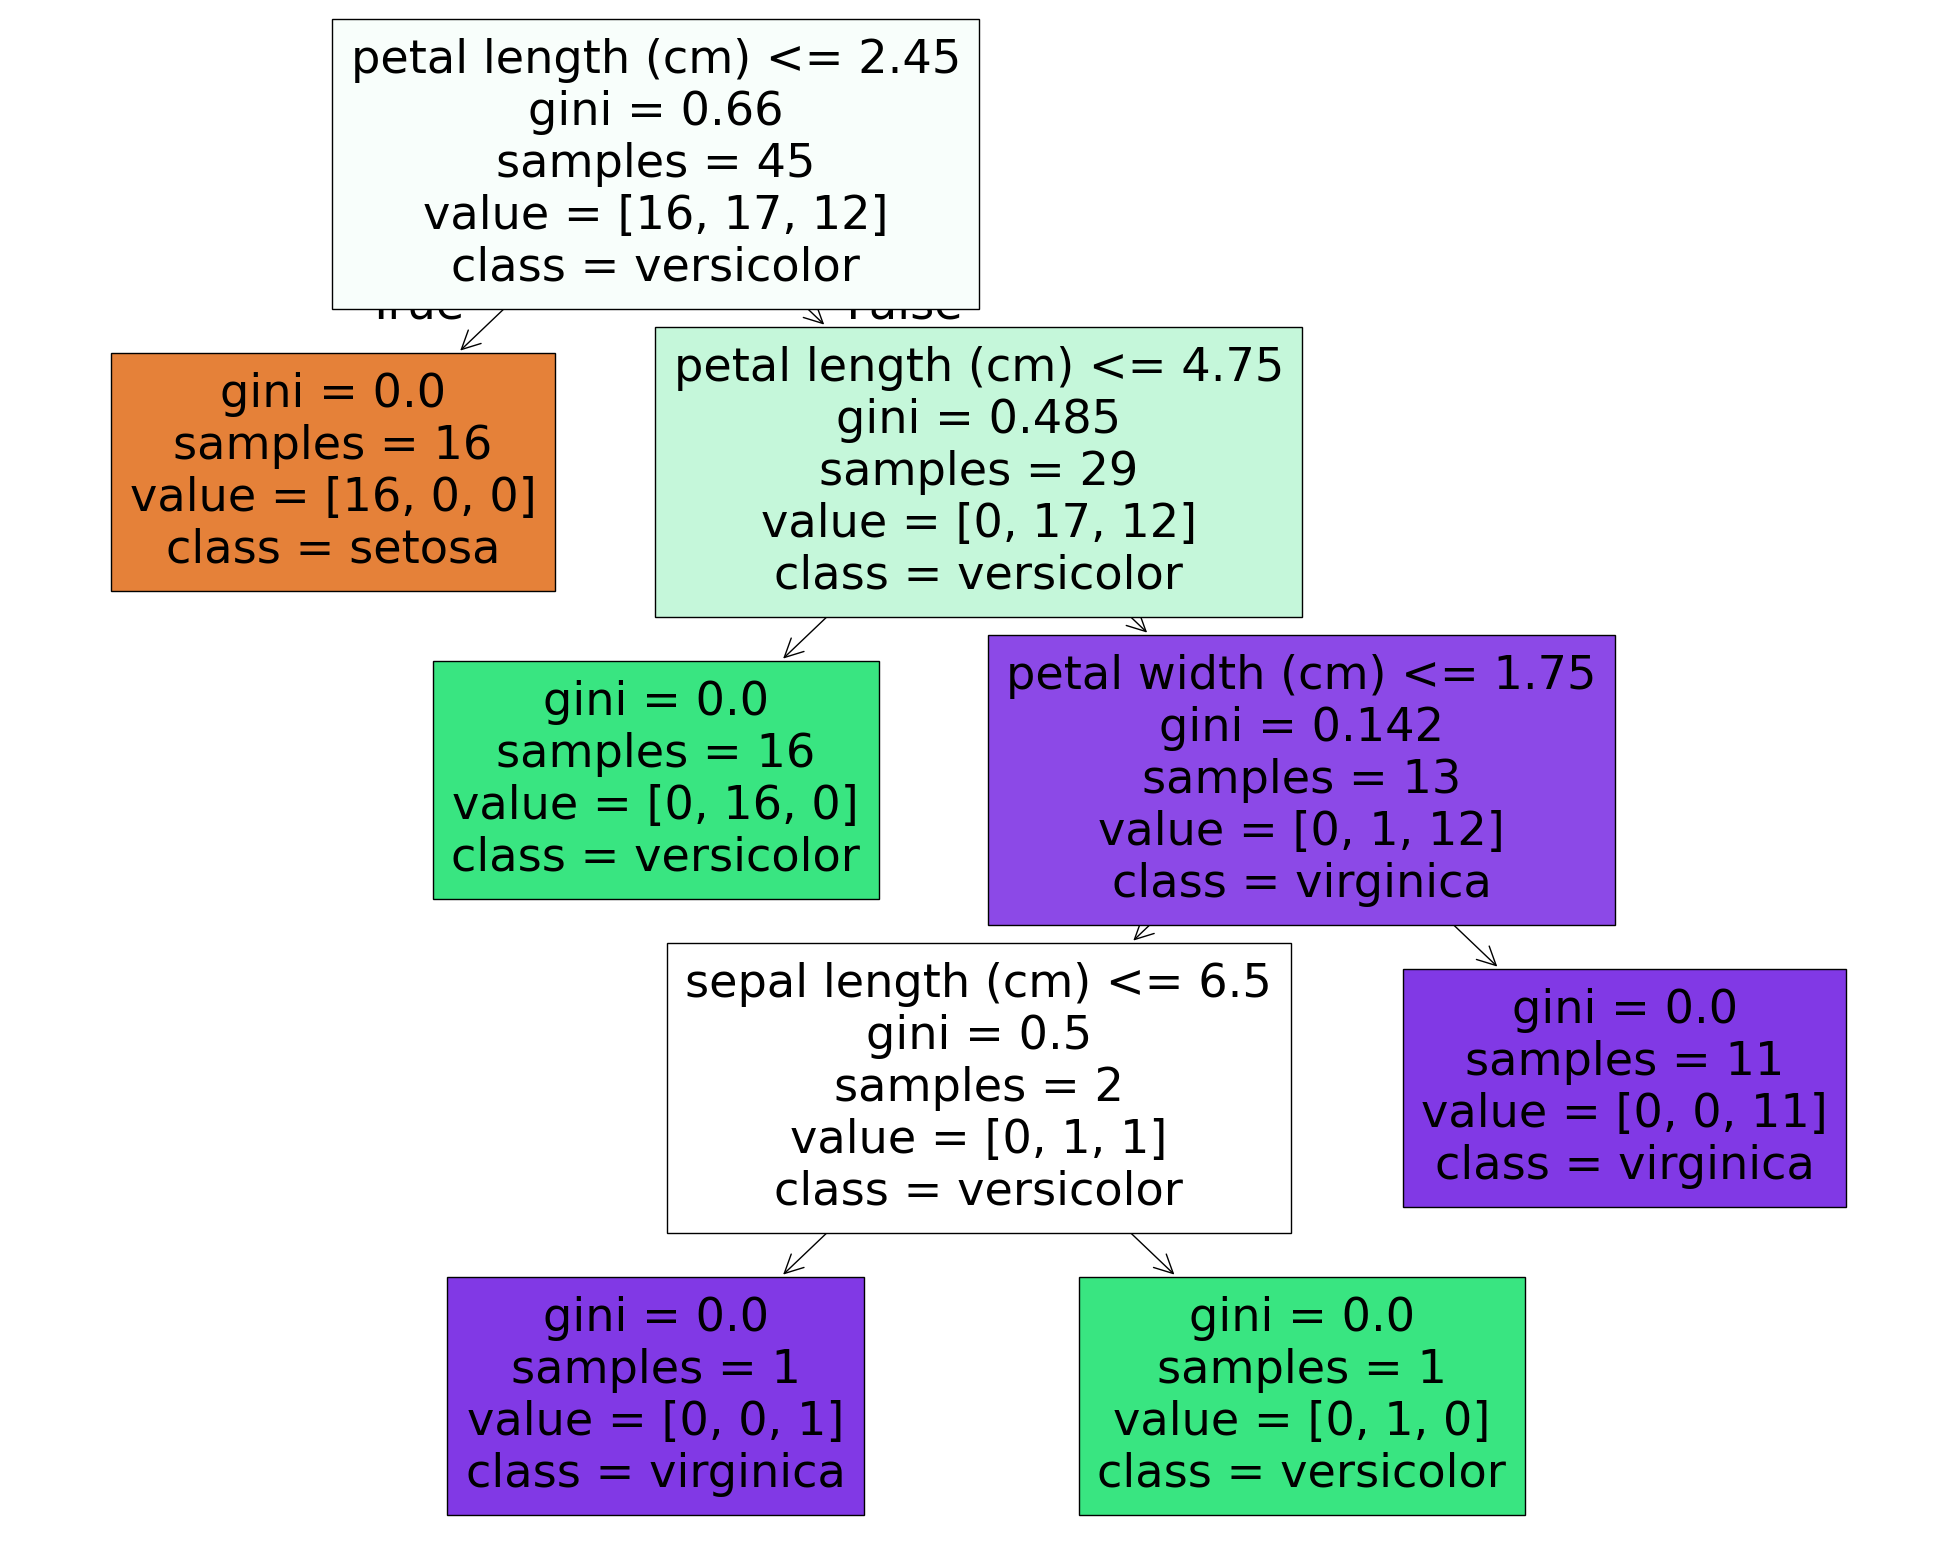

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_test, feature_names=fn, class_names=cn,filled=True)
#fig.savefig('imagename1.png')
fig.savefig("decistion_tree_test.png")

Visualize the Decision Tree on Overall Data

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
dt = clf.fit(X, y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [ ]:
with open("decistion_tree.log", "w") as fout:
 fout.write(text_representation)

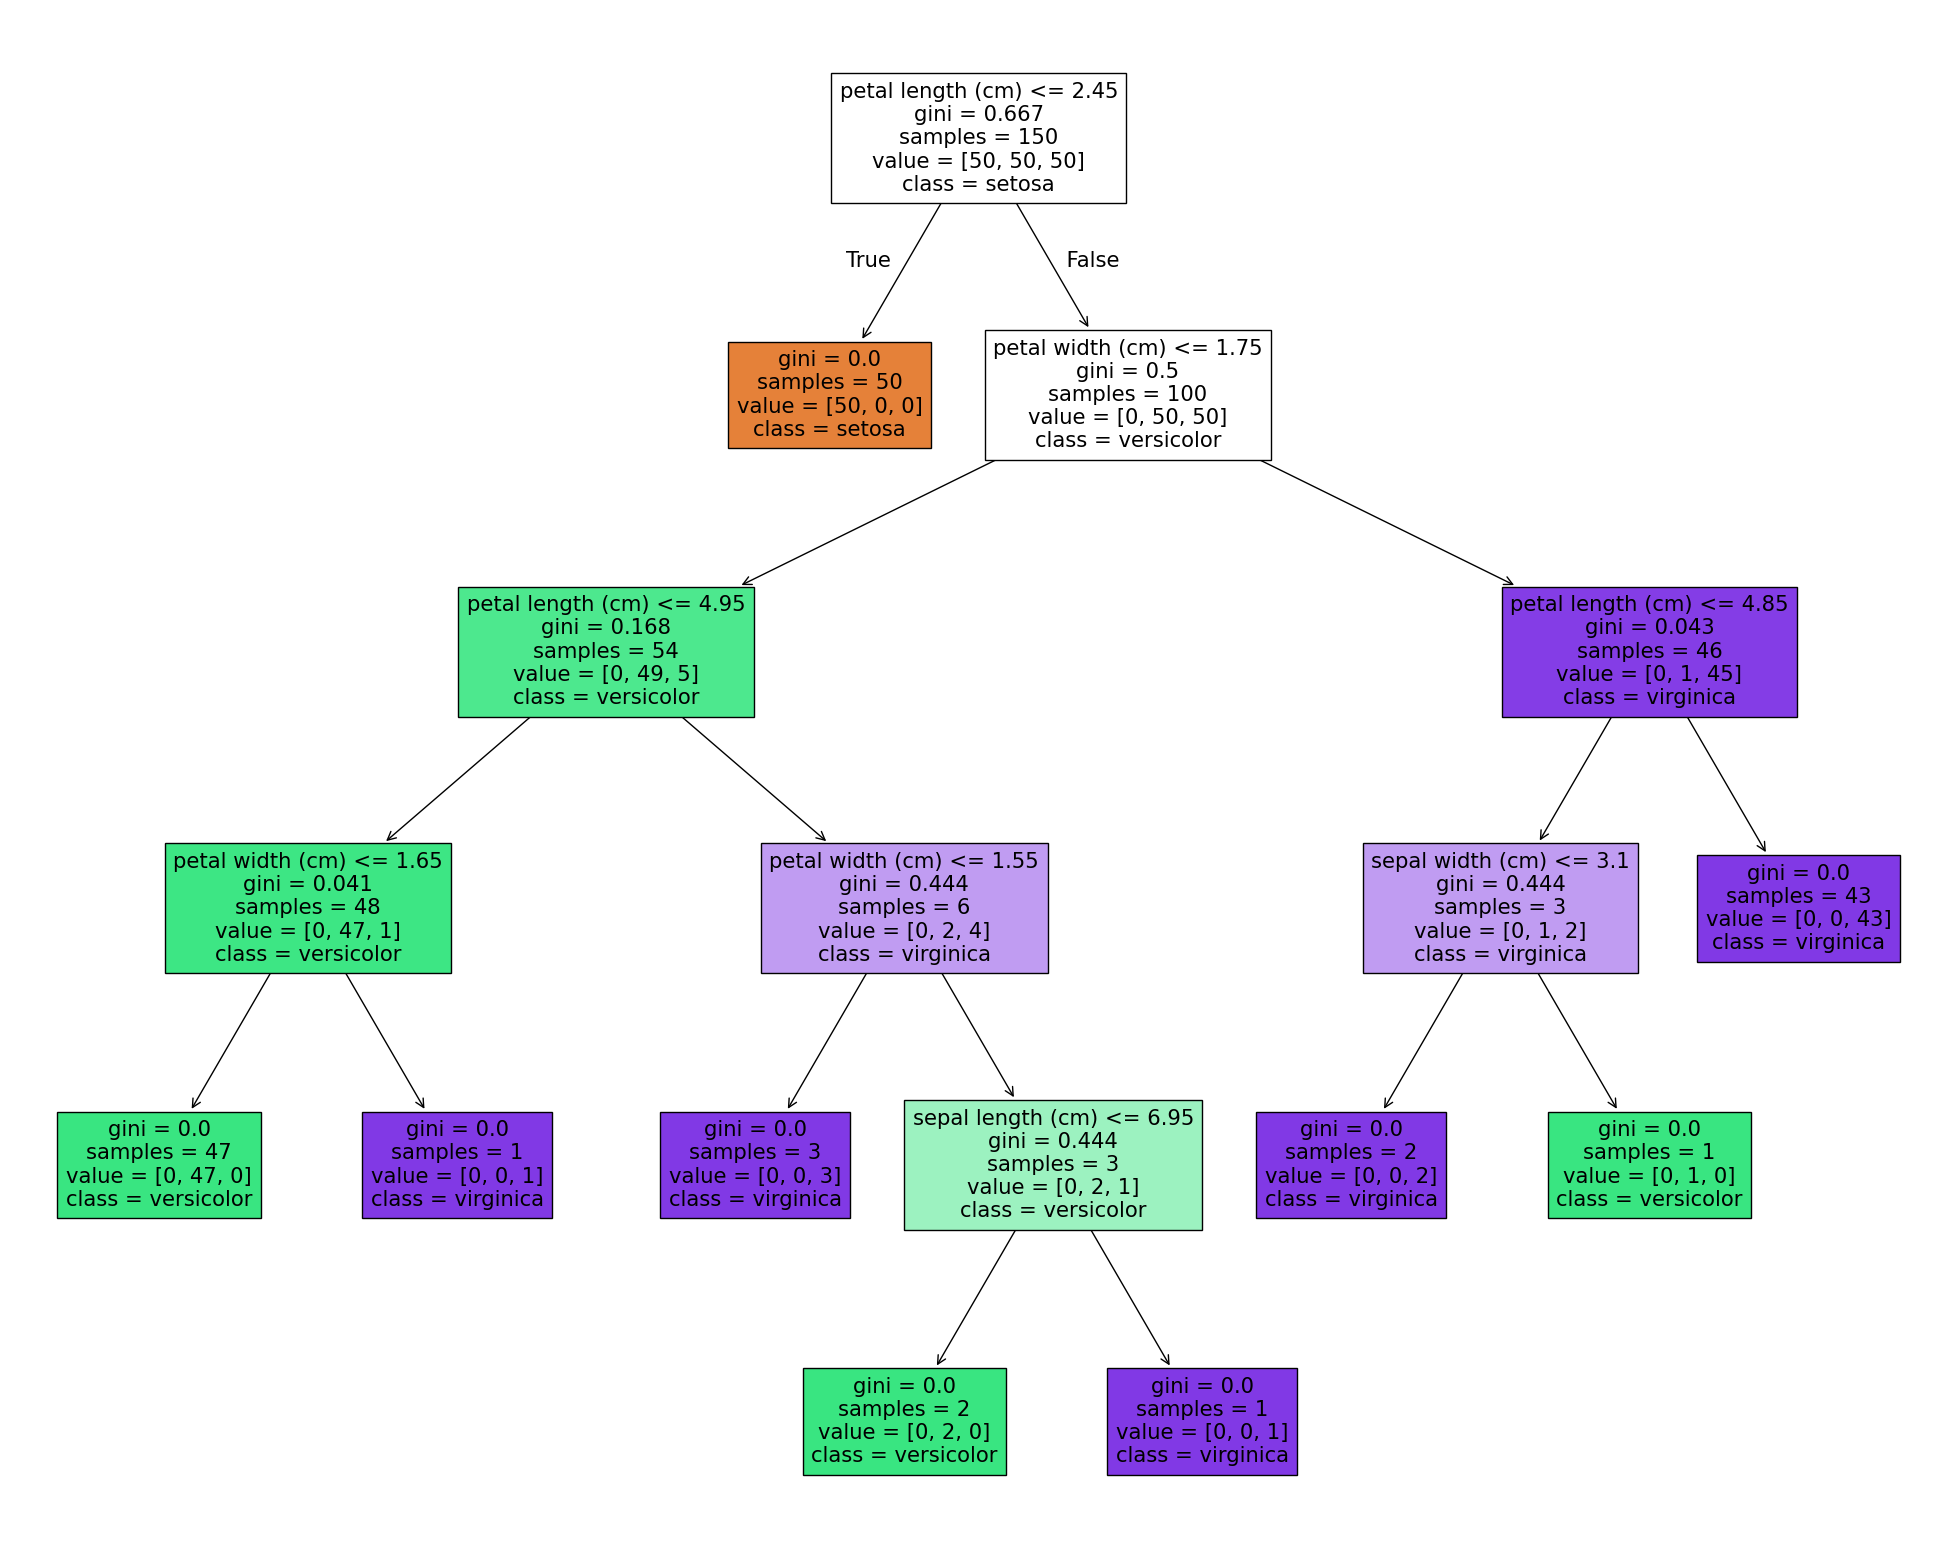

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=fn, class_names=cn,filled=True)

fig.savefig("decision_tree.png")